In [1]:
import openeo

In [1]:
import openeo
#import xarray as xr

In [ ]:
connection = openeo.connect('earthengine.openeo.org/v1.0').authenticate_oidc(client_id='1029015703668-btbgi4lvp2q35g08fugsauds97sutnfd.apps.googleusercontent.com',
                                                                             client_secret='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')

Authenticated using refresh token.


In [2]:
#connection = openeo.connect('https://openeocloud.vito.be/openeo/1.0.0').authenticate_oidc()
connection = openeo.connect("openeo.dataspace.copernicus.eu/openeo/1.2").authenticate_oidc()

Authenticated using refresh token.


In [3]:
latlonIDs = [[54.3167,10.05,7504.0], [54.4333,9.8167,7521.0], [53.95,10.6833,7539.0]]


In [4]:
def datacube_location_list(coords_list, IDs_list):
    locs_for_datacube =   { "type": "FeatureCollection",
        "features": []
    }
    for coord_index, coords in enumerate(coords_list):
        locs_for_datacube["features"].append({"type": "Feature", "properties": {'name':IDs_list[coord_index]}, "geometry": {"type": "Point", "coordinates": coords[:2]}})
    return locs_for_datacube

In [5]:
def datacube_box(coords, ID, box_width=0.002):
    locs_for_datacube =   { "type": "Polygon",
                           "properties": {'name':ID},
                           "coordinates": [[[coords[1] - box_width, coords[0] - box_width], 
                                           [coords[1] - box_width, coords[0] + box_width], 
                                           [coords[1] + box_width, coords[0] + box_width], 
                                           [coords[1] + box_width, coords[0] - box_width], 
                                           [coords[1] - box_width, coords[0] - box_width]]],
    }
    #for coord_index, coords in enumerate(coords_list):
    #    locs_for_datacube["features"].append({"type": "Feature", "properties": {'name':IDs_list[coord_index]}, "geometry": {"type": "Polygon", "coordinates": [[coords[1] - box_width, coords[0] - box_width], [coords[1] - box_width, coords[0] + box_width], [coords[1] + box_width, coords[0] + box_width], [coords[1] + box_width, coords[0] - box_width]]}})
    return locs_for_datacube

In [ ]:
locs = datacube_location_list(latlonIDs, [coords[2] for coords in latlonIDs])

In [ ]:
locs

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': 7504.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[10.048, 54.314699999999995],
     [10.048, 54.3187],
     [10.052000000000001, 54.3187],
     [10.052000000000001, 54.314699999999995]]}},
  {'type': 'Feature',
   'properties': {'name': 7521.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[9.8147, 54.4313],
     [9.8147, 54.435300000000005],
     [9.818700000000002, 54.435300000000005],
     [9.818700000000002, 54.4313]]}},
  {'type': 'Feature',
   'properties': {'name': 7539.0},
   'geometry': {'type': 'Polygon',
    'coordinates': [[10.681299999999998, 53.948],
     [10.681299999999998, 53.952000000000005],
     [10.6853, 53.952000000000005],
     [10.6853, 53.948]]}}]}

In [6]:
latlonIDs

[[54.3167, 10.05, 7504.0], [54.4333, 9.8167, 7521.0], [53.95, 10.6833, 7539.0]]

In [ ]:
for location in latlonIDs[:1]:
    #locs_for_datacube = {"type": "Point", "properties": {'name':int(location[2])}, "coordinates": location[:2]}
    locs_for_datacube = datacube_location_list([location], [int(location[2])])
    datacube = connection.load_collection(
        "SENTINEL2_L2A",
        #spatial_extent={"west": 5, "south": 47, "east": 16, "north": 56},
        temporal_extent=["2000-01-01", "2020-12-31"],
        bands=["B04", "B08"]
        )
    #datacube = connection.load_collection(
    #    "COPERNICUS/S2_SR_HARMONIZED",
    #    #spatial_extent={"west": 5, "south": 47, "east": 16, "north": 56},
    #    temporal_extent=["2000-01-01", "2020-12-31"],
    #    bands=["B4", "B8"]
    #)
    box_width = 0.002/2
    #locationed = datacube.filter_bbox([location[1] - box_width, location[0] - box_width, location[1] + box_width, location[0] + box_width])
    locationed = datacube.aggregate_spatial(geometries=datacube_box(location[:2], int(location[2]), box_width = box_width), reducer='mean')
    res = locationed.save_result(format = "NetCDF", options = {'filename_prefix':f'Station_long_satellites_{int(location[2])}'})#format = "GIF", 
    #                             options = {'filename_prefix':f'Station_long_satellites_{int(location[2])}',
    #                                        'collectionRenderer':'filmstrip'})
    #job = locationed.create_job(title=f'Station_satellites_{int(location[2])}',
    #    description="Sentinel-2 L2A bands",
    #    out_format="NetCDF",
    #    options = {'filename_prefix':f'Station_satellites_{int(location[2])}'}
    #    )
    job = res.execute_batch(title=f'Station_long_satellites_{int(location[2])}')
    jobbed = job.download_results("C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads")
    #job.start()

0:00:00 Job 'j-241212969ae042a6a2bf9f43b9fec117': send 'start'
0:00:16 Job 'j-241212969ae042a6a2bf9f43b9fec117': created (progress 0%)
0:00:21 Job 'j-241212969ae042a6a2bf9f43b9fec117': created (progress 0%)
0:00:28 Job 'j-241212969ae042a6a2bf9f43b9fec117': created (progress 0%)
0:00:36 Job 'j-241212969ae042a6a2bf9f43b9fec117': created (progress 0%)
0:00:46 Job 'j-241212969ae042a6a2bf9f43b9fec117': created (progress 0%)
0:00:58 Job 'j-241212969ae042a6a2bf9f43b9fec117': created (progress 0%)
0:01:13 Job 'j-241212969ae042a6a2bf9f43b9fec117': created (progress 0%)
0:01:33 Job 'j-241212969ae042a6a2bf9f43b9fec117': created (progress 0%)
0:01:57 Job 'j-241212969ae042a6a2bf9f43b9fec117': created (progress 0%)
0:02:27 Job 'j-241212969ae042a6a2bf9f43b9fec117': created (progress 0%)
0:03:04 Job 'j-241212969ae042a6a2bf9f43b9fec117': queued (progress 0%)
0:03:51 Job 'j-241212969ae042a6a2bf9f43b9fec117': queued (progress 0%)
0:04:57 Job 'j-241212969ae042a6a2bf9f43b9fec117': queued (progress 0%)
0:05

In [19]:
connection = openeo.connect('https://umm-api.dev.wekeo.apps.eo4eu.eu/EO').authenticate_oidc()

Failed to parse API error response: [404] '{"error":"RESTEASY003210: Could not find resource for full path: https://auth.apps.eo4eu.eu/auth/realms/EO4EU/account/.well-known/openeo"}' (headers: {'date': 'Thu, 12 Dec 2024 11:38:19 GMT', 'content-type': 'application/json', 'content-length': '138', 'x-xss-protection': '1; mode=block', 'x-frame-options': 'SAMEORIGIN', 'referrer-policy': 'no-referrer', 'strict-transport-security': 'max-age=31536000; includeSubDomains', 'x-content-type-options': 'nosniff'})


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [14]:
latlonIDs = [[54.3167,10.05,7504.0], [54.4333,9.8167,7521.0], [53.95,10.6833,7539.0]]

In [17]:
for location in latlonIDs[:1]:
    #locs_for_datacube = {"type": "Point", "properties": {'name':int(location[2])}, "coordinates": location[:2]}
    #locs_for_datacube = datacube_location_list([location], [int(location[2])])
    datacube = connection.load_collection(
        "MODIS",
        #spatial_extent={"west": 5, "south": 47, "east": 16, "north": 56},
        temporal_extent=["2019-01-01", "2019-06-30"],
        bands=["B01", "B02"]
        )
    #datacube = connection.load_collection(
    #    "COPERNICUS/S2_SR_HARMONIZED",
    #    #spatial_extent={"west": 5, "south": 47, "east": 16, "north": 56},
    #    temporal_extent=["2000-01-01", "2020-12-31"],
    #    bands=["B4", "B8"]
    #)
    box_width = 0.01/2
    locationed = datacube.filter_bbox([location[1] - box_width, location[0] - box_width, location[1] + box_width, location[0] + box_width])
    #locationed = datacube.filter_spatial(geometries=datacube_box(location[:2], int(location[2]), box_width = 0.1))
    res = locationed.save_result(format = "NetCDF", options = {'filename_prefix':f'Station_tsco_satellites_{int(location[2])}'})#format = "GIF", 
    #                             options = {'filename_prefix':f'Station_long_satellites_{int(location[2])}',
    #                                        'collectionRenderer':'filmstrip'})
    #job = locationed.create_job(title=f'Station_satellites_{int(location[2])}',
    #    description="Sentinel-2 L2A bands",
    #    out_format="NetCDF",
    #    options = {'filename_prefix':f'Station_satellites_{int(location[2])}'}
    #    )
    job = res.execute_batch(title=f'Station_long_satellites_{int(location[2])}')
    jobbed = job.download_results("C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads")
    #job.start()

OpenEoApiError: [500] Internal: Server error: Problems during authentication: not enough values to unpack (expected 2, got 1)

In [ ]:
def datacube_location_list(coords_list, IDs_list):
    locs_for_datacube =   { "type": "FeatureCollection",
        "features": []
    }
    for coord_index, coords in enumerate(coords_list):
        locs_for_datacube["features"].append({"type": "Feature", "properties": {'name':IDs_list[coord_index]}, "geometry": {"type": "Point", "coordinates": coords[:2]}})
    return locs_for_datacube

In [ ]:
def extract_at_locs(coords_list, IDs_list, start_date, end_date, chunking_interval = 30, connection_url = "openeo.dataspace.copernicus.eu/openeo/1.2"):
    locs_for_datacube = datacube_location_list(coords_list, IDs_list)
    dates = pd.date_range(start=start_date, end=end_date, freq=f'{chunking_interval}D')
    connection = openeo.connect(connection_url).authenticate_oidc()#
    for date_index in range(len(dates)):
        interval_start = str(dates[date_index].date())
        if date_index != len(dates) - 1:
            interval_end = str(dates[date_index + 1].date()) #str(pd.date_range(start=start_date, end=end_date, freq=f'{29}D')[9].date())
        else:
            interval_end = end_date
        datacube = connection.load_collection(
               "SENTINEL2_L2A",
               temporal_extent=[interval_start, interval_end],
               bands=["B04", "B08"]
               )
        locationed = datacube.aggregate_spatial(geometries = locs_for_datacube, reducer = 'mean')
        res = locationed.save_result(format = "NetCDF", options = {'filename_prefix':f'Station_satellites_{interval_start}'})
        job = res.execute_batch(title=f'Station_satellites_{interval_start}')
        job.get_results().download_files("C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd")
        
                                

In [ ]:
connection = openeo.connect('https://openeocloud.vito.be/openeo/1.0.0').authenticate_oidc()

NameError: name 'openeo' is not defined

In [ ]:
connection = openeo.connect('earthengine.openeo.org/v1.0').authenticate_oidc(client_id='1029015703668-btbgi4lvp2q35g08fugsauds97sutnfd.apps.googleusercontent.com',
                                                                             client_secret='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')#,

#                                                                                                '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')
#'1029015703668-3g0ei5ec7fb066bqs89s67jrf0e05m28.apps.googleusercontent.com')#(client_id='1029015703668-3g0ei5ec7fb066bqs89s67jrf0e05m28.apps.googleusercontent.com')#_client_credentials('1029015703668-3g0ei5ec7fb066bqs89s67jrf0e05m28.apps.googleusercontent.com',
                                                                                                        #'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')

Authenticated using refresh token.


In [ ]:
latlonID[:, :2].tolist()

In [ ]:
latlonID = Maize_set.ds_ML_modelled_observed.reset_index()[['lat', 'lon', 'Stations_id']].drop_duplicates().dropna().values
#extract_at_locs(latlonID[:, :2].tolist(), latlonID[:, 2], '2019-01-01', '2019-04-30', chunking_interval=15, connection_url='https://earthengine.openeo.org/v1.0')

In [ ]:
print(latlonID)

[[5.43167e+01 1.00500e+01 7.50400e+03]
 [5.44333e+01 9.81670e+00 7.52100e+03]
 [5.39500e+01 1.06833e+01 7.53900e+03]
 ...
 [4.81167e+01 8.25000e+00 1.07950e+04]
 [5.41167e+01 1.30667e+01 1.25590e+04]
 [5.03667e+01 1.06000e+01 1.34460e+04]]


In [ ]:
import csv
 
 
# field names 
fields = ['lat', 'lon', 'ID'] 

 
with open('downloads/locations.txt', 'w') as f:
     
    # using csv.writer method from CSV package
    write = csv.writer(f)
     
    write.writerow(fields)
    write.writerows(latlonID)

In [ ]:
dataarray.close()

In [ ]:
start_date = '01-01-2019'
end_date = '03-05-2020'
str(pd.date_range(start=start_date, end=end_date, freq=f'{29}D').date)

'[datetime.date(2019, 1, 1) datetime.date(2019, 1, 30)\n datetime.date(2019, 2, 28) datetime.date(2019, 3, 29)\n datetime.date(2019, 4, 27) datetime.date(2019, 5, 26)\n datetime.date(2019, 6, 24) datetime.date(2019, 7, 23)\n datetime.date(2019, 8, 21) datetime.date(2019, 9, 19)\n datetime.date(2019, 10, 18) datetime.date(2019, 11, 16)\n datetime.date(2019, 12, 15) datetime.date(2020, 1, 13)\n datetime.date(2020, 2, 11)]'

In [ ]:

locs_for_datacube = datacube_location_list(latlonID[:, :2].tolist(), latlonID[:, 2])
print(len(locs_for_datacube['features']))

2208


In [ ]:
#S2 = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
# Connect to openEO back-end.
connection = openeo.connect("openeo.dataspace.copernicus.eu/openeo/1.2").authenticate_oidc()

Authenticated using refresh token.


In [ ]:
#locs_for_datacube =   { "type": "Point",
#    "features": []
#}
coords = Maize_set.ds_ML_modelled_observed.reset_index()[['lat', 'lon', 'Stations_id']].drop_duplicates().dropna().values[:3, :]
locs_for_datacube = {"type": "Point", "properties": {}, "coordinates": coords[0, :].tolist()}#{"type": "MultiPoint", "properties": {}, "coordinates": coords.tolist()}
#for coords in Maize_set.ds_ML_modelled_observed.reset_index()[['lat', 'lon', 'Stations_id']].drop_duplicates().dropna().values.tolist()[:10]:
#    locs_for_datacube["features"].append({"type": "Feature", "properties": {'name':coords[2]}, "geometry": {"type": "Point", "coordinates": coords[:2]}})#'name':coords[2]

In [ ]:
for location in coords.tolist():
    #locs_for_datacube = {"type": "Point", "properties": {'name':int(location[2])}, "coordinates": location[:2]}
    locs_for_datacube = datacube_location_list([location], [int(location[2])])
    datacube = connection.load_collection(
        "SENTINEL2_L2A",
        #spatial_extent={"west": 5, "south": 47, "east": 16, "north": 56},
        temporal_extent=["2019-01-01", "2019-01-31"],
        bands=["B04", "B08"]
        )
    locationed = datacube.aggregate_spatial(geometries = locs_for_datacube, reducer = 'mean')
    #res = locationed.save_result(format = "NetCDF", options = {'filename_prefix':f'Station_satellites_{location[2]}'})
    job = locationed.create_job(title=f'Station_satellites_{int(location[2])}',
        description="Sentinel-2 L2A bands",
        out_format="NetCDF",
        options = {'filename_prefix':f'Station_satellites_{int(location[2])}'}
        )
    #job = res.execute_batch(title=f'Station_satellites_{location[2]}')
    job.start()#get_results().download_files("C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads")

In [ ]:
locs_for_datacube

{'type': 'Point', 'properties': {'name': 7665}, 'coordinates': [53.6333, 9.85]}

In [ ]:
datacube = connection.load_collection(
  "COPERNICUS/S2_SR_HARMONIZED",
  #spatial_extent={"west": 5, "south": 47, "east": 16, "north": 56},
  temporal_extent=["2019-01-01", "2019-12-20"],
  bands=["B4", "B8"]
)
locationed = datacube.filter_spatial(geometries = locs_for_datacube)#, reducer = 'mean')
#res = locationed.save_result(format = "JSON")
job = locationed.create_job(title="Sentinel2",
    description="Sentinel-2 L2A bands",
    out_format="JSON",
    sample_by_feature = True,
    zipped=True)

In [ ]:
job.start()

<BatchJob job_id='S6gSWFOgkgDxCoEZ'>

In [ ]:
dataarray

<xarray.DataArray (band: 2, y: 1931, x: 1263)>
[4877706 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1 2
  * x            (x) float64 53.62 53.62 53.62 53.62 ... 54.75 54.75 54.75 54.75
  * y            (y) float64 10.7 10.7 10.7 10.7 ... 8.969 8.968 8.967 8.967
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              0
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
import rioxarray as rxr

dataarray = rxr.open_rasterio('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads\\download2.tif')
#dataarray = xr.open_rasterio('file.tif')

df = dataarray[0].to_pandas()

In [ ]:
dataarray

<xarray.DataArray (band: 2, y: 1931, x: 1263)>
[4877706 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1 2
  * x            (x) float64 53.62 53.62 53.62 53.62 ... 54.75 54.75 54.75 54.75
  * y            (y) float64 10.7 10.7 10.7 10.7 ... 8.969 8.968 8.967 8.967
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              0
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
jobbed = job.download_files("C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads")

AttributeError: 'BatchJob' object has no attribute 'download_files'

In [ ]:
job = res.execute_batch(title="ee_try")

0:00:00 Job '2Rci7DWMTZ1weWyc': send 'start'
0:00:00 Job '2Rci7DWMTZ1weWyc': running (progress N/A)
0:00:05 Job '2Rci7DWMTZ1weWyc': running (progress N/A)
0:00:12 Job '2Rci7DWMTZ1weWyc': finished (progress N/A)


In [ ]:
import geopandas as gpd
result = gpd.read_file('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads\\95c0f3d90f24cff8.geojson')

DriverError: 'C:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\downloads\95c0f3d90f24cff8.geojson' not recognized as a supported file format.

In [ ]:
df.drop_duplicates().T.drop_duplicates().T

x,53.616397,53.617295
y,,
10.700283,127,0
10.699384,0,0


In [ ]:
job.get_results().download_files("C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads")

[WindowsPath('C:/Users/wlwc1989/Documents/Phenology_Test_Notebooks/phenology_dwd/downloads/95c0f3d90f24cff8.json'),
 WindowsPath('C:/Users/wlwc1989/Documents/Phenology_Test_Notebooks/phenology_dwd/downloads/job-results.json')]

In [ ]:
df = pd.DataFrame('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads\\95c0f3d90f24cff8.geojson')

ValueError: DataFrame constructor not properly called!

In [ ]:
import json

# Opening JSON file
f = open('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads\\95c0f3d90f24cff8.json')

# returns JSON object as a dictionary
data = json.load(f)
for index, feature in enumerate(data['features']):
    if index == 0:
        df = pd.DataFrame(feature['properties'])
    else:
        df = pd.concat([df, pd.DataFrame(feature['properties'])])
#df = pd.DataFrame(data['features'])
# Iterating through the json list
#for i in data['emp_details']:
#    print(i)

# Closing file
f.close()

In [ ]:
df.columns#['properties'][0]

Index(['DATATAKE_IDENTIFIER', 'AOT_RETRIEVAL_ACCURACY', 'SPACECRAFT_NAME',
       'SATURATED_DEFECTIVE_PIXEL_PERCENTAGE',
       'MEAN_INCIDENCE_AZIMUTH_ANGLE_B8A', 'CLOUD_SHADOW_PERCENTAGE',
       'MEAN_SOLAR_AZIMUTH_ANGLE', 'system:footprint', 'VEGETATION_PERCENTAGE',
       'SOLAR_IRRADIANCE_B12', 'SOLAR_IRRADIANCE_B10', 'SENSOR_QUALITY',
       'SOLAR_IRRADIANCE_B11', 'GENERATION_TIME', 'SOLAR_IRRADIANCE_B8A',
       'FORMAT_CORRECTNESS', 'CLOUD_COVERAGE_ASSESSMENT',
       'THIN_CIRRUS_PERCENTAGE', 'system:time_end',
       'WATER_VAPOUR_RETRIEVAL_ACCURACY', 'system:time_start', 'DATASTRIP_ID',
       'PROCESSING_BASELINE', 'SENSING_ORBIT_NUMBER',
       'NODATA_PIXEL_PERCENTAGE', 'SENSING_ORBIT_DIRECTION', 'GENERAL_QUALITY',
       'GRANULE_ID', 'REFLECTANCE_CONVERSION_CORRECTION',
       'MEDIUM_PROBA_CLOUDS_PERCENTAGE', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B8',
       'DATATAKE_TYPE', 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B9',
       'MEAN_INCIDENCE_AZIMUTH_ANGLE_B6', 'MEAN_INCIDENCE_AZIMUTH

In [ ]:
result = pd.read_json('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads\\95c0f3d90f24cff8.json', orient='index')

In [ ]:
result[0]

type                                            ImageCollection
bands                                                        []
version                                        1733826013281314
id                                  COPERNICUS/S2_SR_HARMONIZED
properties    {'date_range': [1490659200000, 1647907200000],...
features      [{'type': 'Image', 'bands': [{'id': 'B4', 'dat...
Name: 0, dtype: object

In [ ]:
#result = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads\\95c0f3d90f24cff8.json')
result = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\downloads\\openEO.nc')

In [ ]:
result.isel(x=15, y=15)['B04'].values
result['t']

<xarray.DataArray 't' (t: 12)>
array(['2019-01-03T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-01-08T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-13T00:00:00.000000000', '2019-01-15T00:00:00.000000000',
       '2019-01-18T00:00:00.000000000', '2019-01-20T00:00:00.000000000',
       '2019-01-23T00:00:00.000000000', '2019-01-25T00:00:00.000000000',
       '2019-01-28T00:00:00.000000000', '2019-01-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * t        (t) datetime64[ns] 2019-01-03 2019-01-05 ... 2019-01-28 2019-01-30
Attributes:
    standard_name:  t
    long_name:      t
    axis:           T

In [ ]:
print([dataset_info['summary'] for dataset_info in connection.list_processes()[123:]])
print(connection.list_processes()[123])

[]


IndexError: list index out of range

RuntimeError: NetCDF: HDF error

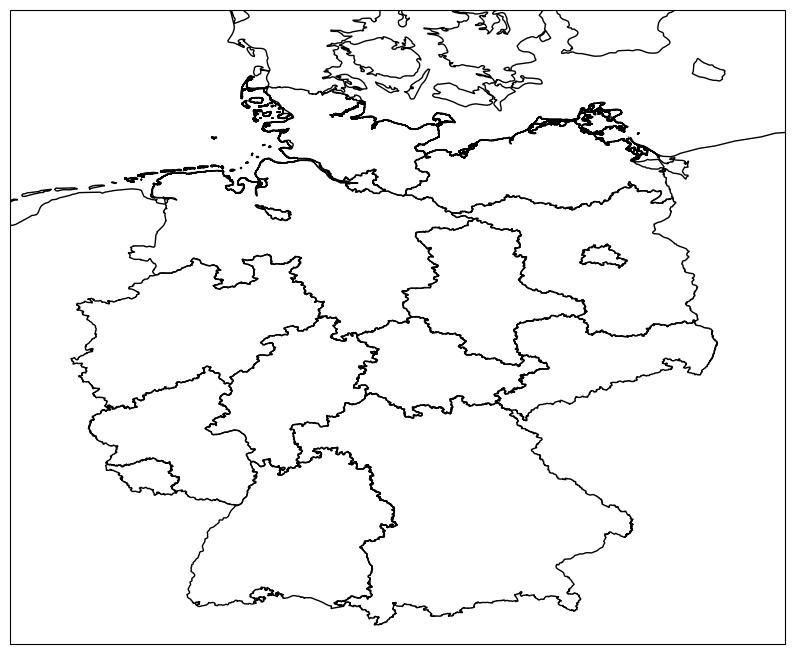

In [ ]:
#job.get_results().download_files("C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd")
#Sat_Vars2 = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\timeseries.nc')
#Sat_Vars = xr.load_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\timeseries.nc')
#np.isnan(Sat_Vars2['B04'].values)
fig, ax = plotting.Germany_plot()
for ind, latlon in enumerate(Maize_set.ds_ML_modelled_observed[['lat', 'lon']].drop_duplicates().values.tolist()[:100]):
    #print(latlon, Sat_Vars2['B04'][:, 20].values[ind])
    if np.isnan(Sat_Vars2['B08'][:, 17].values[ind]):
        ax.scatter(latlon[1], latlon[0], c = 'red')
    else:
        ax.scatter(latlon[1], latlon[0], c = 'blue')



In [ ]:
def get_images_after_emergence(Img_Collection, emergence_date, length_of_period = 300):
    end_date = emergence_date + np.timedelta64(length_of_period, 'D')
    Img_Collection = Img_Collection.filterDate(emergence_date, end_date)
    return Img_Collection

In [ ]:
S2 = get_images_after_emergence(S2, Maize_set.GDD_driver_data['time'][0][0].values).select('B4', 'B8', 'QA60')

In [ ]:
S2.get()

In [ ]:
Maize_set.GDD_driver_data['time'][0][0].values

numpy.datetime64('2007-05-02T12:00:00.000000000')